# Titanic - Machine Learning from Disaster
Start here! Predict survival on the Titanic and get familiar with ML basics

## Data Dictionary


| Variable	| Definition	| Key  |
|---|---|---|
|survival 	| Survival 	| 0 = No, 1 = Yes  |
|pclass		| Passenger Class	| 1 = 1st, 2 = 2nd, 3 = 3rd  |
|sex 	| Sex  |  |
| Age	| Age in years 
|sibsp 	|# of siblings / spouses aboard the Titanic 	
|parch 	|# of parents / children aboard the Titanic |   |	
|ticket 	|Ticket number  |   | 
|fare 	|Passenger fare 	  |   | 
|cabin 	|Cabin number  |   |  	
|embarked 	|Port of Embarkation 	|C = Cherbourg, Q = Queenstown, S = Southampton|

## Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

<br>

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

<br>


sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

<br>


parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## Features Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dealing with Name Colummn

- Let's Find how many unique First Names are there 

In [4]:
df_train['Name'].str.split().str[0].nunique()

661

- As there are so many unique values of First Name hence it will no be a great idea to make a Col. with the First Name

- Let's check for Middle Name

In [5]:
df_train['Name'].str.split(',').str[1].str.split().str[0].nunique()

17

- This seems good Idea to make a separate column for Middle Name as Title

In [6]:
df_train['Name'].str.split(',').str[1].str.split().str[0].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name, dtype: int64

In [7]:
# Selecting the Salutation Part from the Name 
def select_salutation(name):
    return name.split(',')[1].split()[0]

In [8]:
# Making a new column as Title for the Salutation
df_train['Title'] = np.vectorize(select_salutation)(df_train["Name"])
df_test['Title'] = np.vectorize(select_salutation)(df_test["Name"])

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [10]:
df_train['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Title, dtype: int64

- In last Few Middle Name are very less common hence making a unique category for those who appears more than 5 times and placing the rest in a common Category called Rare

In [11]:
# Selecting top 5 Title 
most_freq_titles = df_train['Title'].value_counts()[(df_train['Title'].value_counts()) > 2].index

In [12]:
# Making a category of top 5 Titles and placing rest of them as 'Others'
df_train['Title'] = np.where((df_train['Title'].isin(most_freq_titles)),df_train['Title'],'Rare')
df_test['Title'] = np.where((df_test['Title'].isin(most_freq_titles)),df_test['Title'],'Rare')

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [14]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


### Checking null Values

In [15]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

- Mostly there are Missing Values in Age and Cabin

In [16]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

- Same as in training data mostly values are missing in Age and Cabin

#### Missing Values of Age

In [17]:
df_train.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
df_train['Age'].skew()

0.38910778230082704

<AxesSubplot:xlabel='Age', ylabel='Density'>

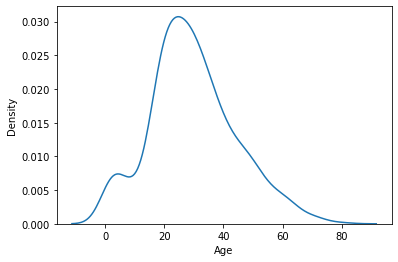

In [19]:
sns.kdeplot(x="Age",data=df_train)

- Storing the Age values in a new variable for later use

In [20]:
temp_age = df_train['Age'].dropna()

- It is clear from above that Age's KDE plot is slightly right skewed

In [21]:
ini_var_train = df_train.Age.var()
ini_var_train

211.01912474630802

In [22]:
ini_var_test = df_test.Age.var()
ini_var_test

201.10669538455943

- Variance is also so high

In [23]:
print("df_train Variance on changing missing values by Mean",df_train.Age.fillna(df_train.Age.mean()).var())
print("df_test Variance on changing missing values by Mean",df_test.Age.fillna(df_test.Age.mean()).var())

df_train Variance on changing missing values by Mean 169.0523999372108
df_test Variance on changing missing values by Mean 159.63145365057355


In [24]:
print("df_train Variance on changing missing values by Median",df_train.Age.fillna(df_train.Age.median()).var())
print("df_test Variance on changing missing values by Median",df_test.Age.fillna(df_test.Age.median()).var())

df_train Variance on changing missing values by Median 169.51249827942345
df_test Variance on changing missing values by Median 161.38576830860669


- As Age Distribution is slightly Right Skewed and have a very large std/var. Hence we can't Replace the Missing Values with the Mean or Median.
- As After Replacing by Mean or Median Variance Changes so drastically

In [25]:
df_train[df_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr.
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs.
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr.
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr.
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss.
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr.
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr.


In [26]:
print(df_train[df_train['Age'].isnull()]['Parch'].value_counts())
df_train['Parch'].value_counts()

0    157
2     12
1      8
Name: Parch, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
print(df_train[df_train['Age'].isnull()]['SibSp'].value_counts())
df_train['SibSp'].value_counts()

0    137
1     26
8      7
3      4
2      3
Name: SibSp, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
print(df_train[df_train['Age'].isnull()]['Sex'].value_counts())
df_train['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64


male      577
female    314
Name: Sex, dtype: int64

- From Above we haven't noticed any highlighting pattern in the missing values of Age
- Therefore it is clear that Value is missing At Random
- Hence filling them by the mean of the the groups made by the similiar Parch,Pclass,Sex,SibSp and Title

In [29]:
missing_data = df_train.groupby(['Title','Pclass','Sex','Embarked','SibSp','Parch']).mean()['Age'].reset_index()
missing_data

,Title,Pclass,Sex,Embarked,SibSp,Parch,Age
0,Dr.,1,female,S,0,0,49.0
1,Dr.,1,male,C,0,0,32.0
2,Dr.,1,male,Q,2,0,44.0
3,Dr.,1,male,S,2,0,50.0
4,Dr.,2,male,S,0,0,38.5
...,...,...,...,...,...,...,...
165,Rare,2,female,S,0,0,28.0
166,Rev.,2,male,Q,0,0,57.0
167,Rev.,2,male,S,0,0,40.0
168,Rev.,2,male,S,0,1,28.0


- Now filling these missing Values

In [30]:
col_group_by = ['Title','Embarked','Pclass','Sex','SibSp','Parch']
df_train['Age'] = df_train['Age'].fillna(df_train.groupby(col_group_by)['Age'].transform('mean'))

In [31]:
print(df_train['Age'].isnull().sum())

24


In [32]:
print(ini_var_train)
df_train.Age.var()

211.01912474630802


187.84160009587217

- Doing the same in test_data

In [33]:
df_test['Age'] = df_test['Age'].fillna(df_test.groupby(col_group_by)['Age'].transform('mean'))

In [34]:
print(df_test['Age'].isnull().sum())

17


In [35]:
print(ini_var_test)
df_test.Age.var()

201.10669538455943


177.33565523482218

In [36]:
df_train[df_train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs.
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,Mr.
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,Mr.
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Master.
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,Miss.
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Master.
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss.
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,Mrs.
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Mr.
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,Mr.


In [37]:
df_test[df_test['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,Mrs.
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,Mr.
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,Rare
121,1013,3,"Kiernan, Mr. John",male,NaN,1,0,367227,7.7500,NaN,Q,Mr.
127,1019,3,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.2500,NaN,Q,Miss.
132,1024,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S,Mrs.
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss.
199,1091,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,NaN,0,0,65305,8.1125,NaN,S,Mrs.
225,1117,3,"Moubarek, Mrs. George (Omine Amenia"" Alexander)""",female,NaN,0,2,2661,15.2458,NaN,C,Mrs.
244,1136,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,Master.


- In above Data all the missing values are from Pclass 3
- Hence we can now fill them with the median/mean value of Pclass 3 and check if variance vary too much in doing so or not

In [38]:
df_train['Age'].fillna(df_train[df_train['Pclass']==3].Age.median()).var()

183.17323008175575

- mean is giving better result
- As Variance varry by approx 5
- let's try fill missing values by again using cat. mean but this time excluding the Pclass, Parch and SibSp col.

In [39]:
df_train.Age.fillna(df_train.groupby(['Title','Embarked','Sex'])['Age'].transform('median')).var()

186.8740678739396

In [40]:
df_train.Age.fillna(df_train.groupby(['Title','Embarked','Sex'])['Age'].transform('mean')).var()

186.1962165465702

- here we are not getting that much change in variance hence accepting this and filing the missing values by the median 

In [41]:
df_train['Age'] = df_train.Age.fillna(df_train.groupby(['Title','Embarked','Sex'])['Age'].transform('median'))

- Applying the same in test data

In [42]:
df_test['Age'] = df_test.Age.fillna(df_test.groupby(['Title','Embarked','Sex'])['Age'].transform('median'))

- Checking the remaining missing values

In [43]:
df_train.Age.isna().sum()

0

In [44]:
df_test.Age.isna().sum()

1

- Now we removed all the missing values from training data
- let's see which 1 is remaining in test

In [45]:
df_test[df_test['Age'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Rare


This is the female Travelling Alone hence we can fill this accordingly by the median of same females

In [46]:
df_test['Age'] = df_test.Age.fillna(df_test.groupby(['SibSp','Parch','Sex'])['Age'].transform('median'))

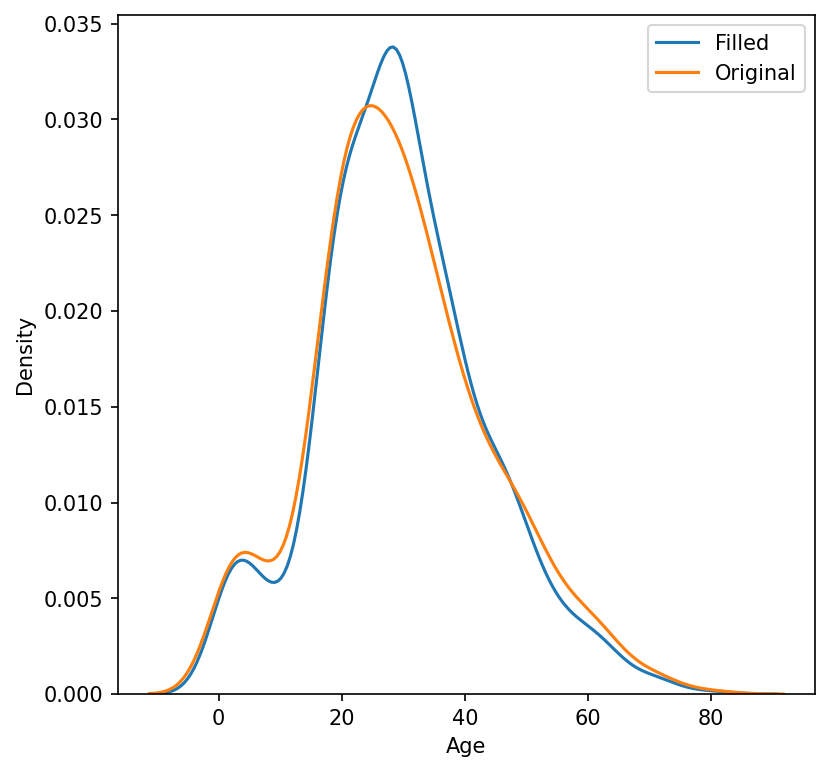

In [47]:
plt.figure(figsize=(6,6),dpi=150)
sns.kdeplot(x='Age',data=df_train, label='Filled')
sns.kdeplot(x=temp_age, label='Original')
plt.legend()
# KDE plot is almost same

- There is slight change in the Data shape which is acceptable
- Age column is now Done!

#### Missing Values of Cabin

In [48]:
df_train['Cabin'].isna().sum()/df_train.shape[0]

0.7710437710437711

In [49]:
df_train[df_train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
5,6,0,3,"Moran, Mr. James",male,37.0,0,0,330877,8.4583,NaN,Q,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr.
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs.
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss.


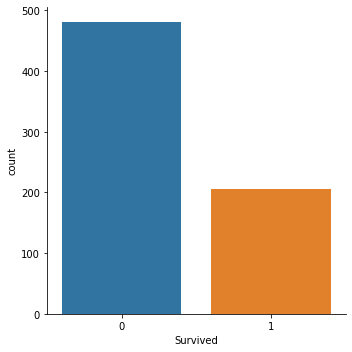

In [50]:
from itertools import count
sns.catplot(x='Survived', kind='count',data=df_train[df_train['Cabin'].isna()])

- As approx 77% of the Cabin Values are missing hence dropping it
- This is genuine also because most of them whose Cabin Value is missing have died so there is no one to tell there Cabin no. and who are Alive they may have forgotten because of the disaster they faced.

In [51]:
df_train.drop(['Cabin'],axis=1,inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


In [52]:
df_test.drop(['Cabin'],axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs.


#### Missing Values of Embarked

In [53]:
df_train[df_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss.
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs.


- Both seems to belong from same family as their ticket no. is Same
- One is Married and another is maiden
- Their Fare and Pclass is same
- Hence checking for Pclass 1 for which Embarked category Mean Fare is around 80

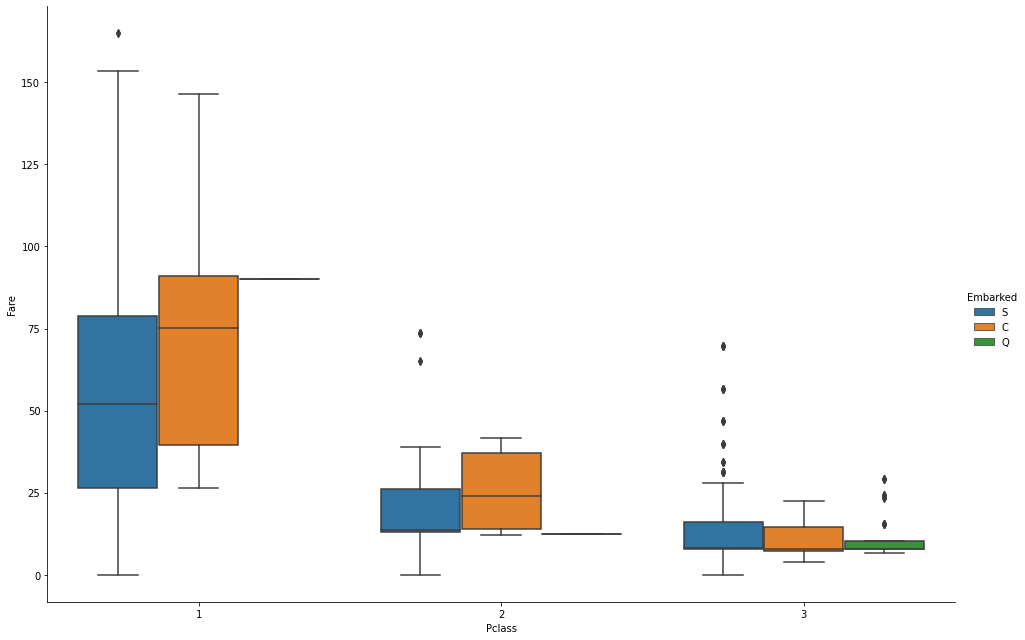

In [54]:
sns.catplot(x="Pclass",y='Fare', hue='Embarked',data=df_train[df_train['Fare']<200], kind='box', height=9, aspect=1.5)

for those who embarked from C and have pclass 1 have their median Fare around 80
- Hence filling The missing values with C

In [55]:
df_train['Embarked'] = df_train['Embarked'].fillna('C')

#### Missing Values of Fare

In [56]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr.


- Filling this with the mean Price of the People who were Travelling in Pclass 3 and Embarked from S 

In [57]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.181818,0,0,A.5. 3236,8.0500,S,Mr.
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Rare
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr.
416,1308,3,"Ware, Mr. Frederick",male,27.181818,0,0,359309,8.0500,S,Mr.


In [58]:
df_test['Fare'] = df_test['Fare'].fillna(df_test.groupby(['Pclass','Embarked'])['Fare'].transform('mean'))

### Dealing with SibSp and Parch Columns as they both together represnt family

In [59]:
df_train['Family'] = df_train["SibSp"] + df_train['Parch']
df_test['Family'] = df_test["SibSp"] + df_test['Parch']

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.,0


### Making Ticket a Categorical Data Based on its First of the Numerical Part of the Ticket

- we can construct a new feature from the Ticket column by the following way,
- * by extracting the first numeric letter of the ticket, 

In [65]:
df_train['Ticket'].str.split().str[-1].str[0].value_counts()

3    367
1    231
2    230
7     15
4     15
6     14
5      9
L      4
9      3
8      3
Name: Ticket, dtype: int64

- but this approach don't make so much sense as first numeric letter of the ticket don't make any sense as it is just a random number

- hence dropping this feature

In [ ]:
df_train.drop(['Ticket'],axis=1,inplace=True)
df_test.drop(['Ticket'],axis=1,inplace=True)

## saving this data into new csv files

In [ ]:
df_train.to_csv("data/for_eda_train.csv",index=False)
df_test.to_csv("data/for_eda_test.csv",index=False)